In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Asus\Desktop\datasets\bestsellers with categories.csv")
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [4]:
print('Dataset contains %d rows with %d columns' % (df.shape[0], df.shape[1]))

Dataset contains 550 rows with 7 columns


In [5]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [6]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


### From this, we understand that the average user rating is 4.6, and the lowest rating is 3.3. The highest rating is 4.9 (no one gave all 5 stars).

### The most expensive book is priced at 105 dollars and the average book price is priced at 13 dollars.


In [7]:
df.describe(include = 'object')

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


### 351 unique book names. Jeff Kinney's book has appeared 10 times in the TOP50 bestselling list. 
### 248 unique author names with Jeff Kinney's book appearing 12 times.



In [8]:
df[df.Price == 0].drop_duplicates(subset = 'Name', inplace = False)

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction


In [9]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

#### Awesome! There are no missing values.

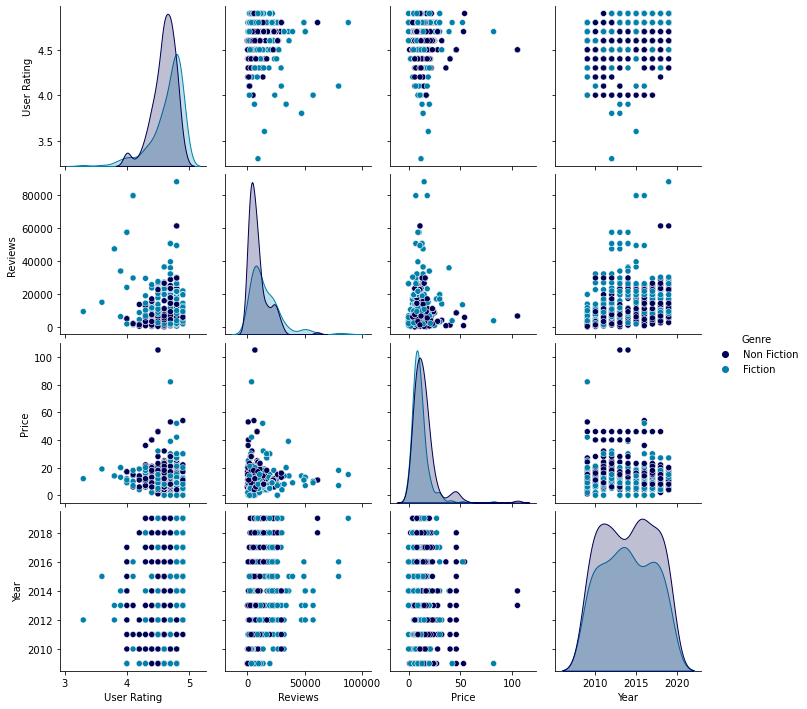

In [10]:
sns.pairplot(df, hue = 'Genre', palette = 'ocean')

### From here, we can see that there are more fiction than non-fiction books. 
### In terms of price, fiction books are priced higher than the latter.
### Higher user ratings have been awarded to fiction than non-fiction. 

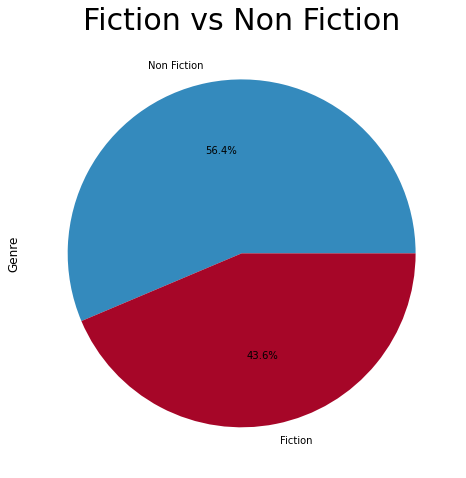

In [11]:
plt.style.use('bmh')
df['Genre'].value_counts().plot.pie(figsize=(15,8), autopct = '%.1f%%')
plt.title('Fiction vs Non Fiction', fontsize = 30)

plt.show()

# Distribution of Fiction/Non-Fiction over the years

<AxesSubplot:xlabel='count', ylabel='Year'>

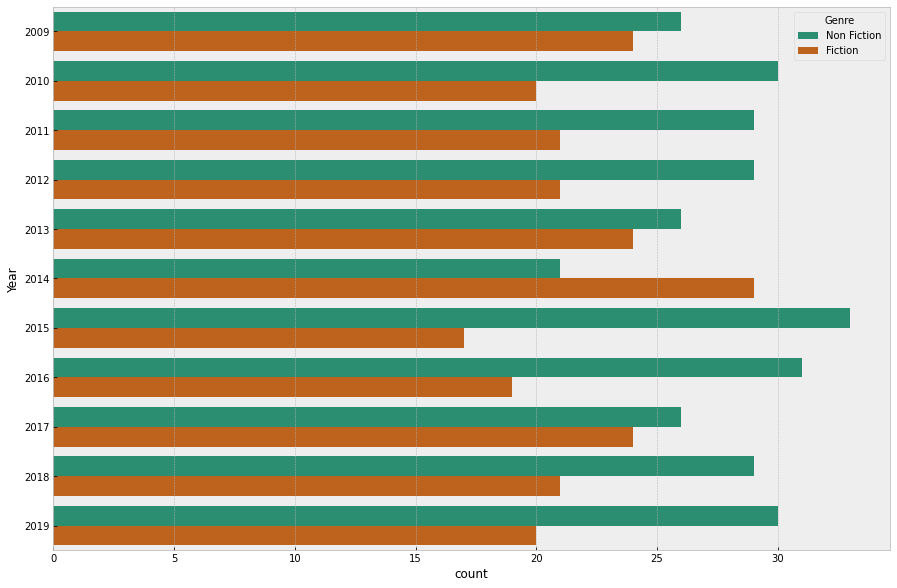

In [12]:
plt.figure(figsize = (15,10))
sns.countplot(y = 'Year', hue = 'Genre', data = df, dodge = True, palette = "Dark2")

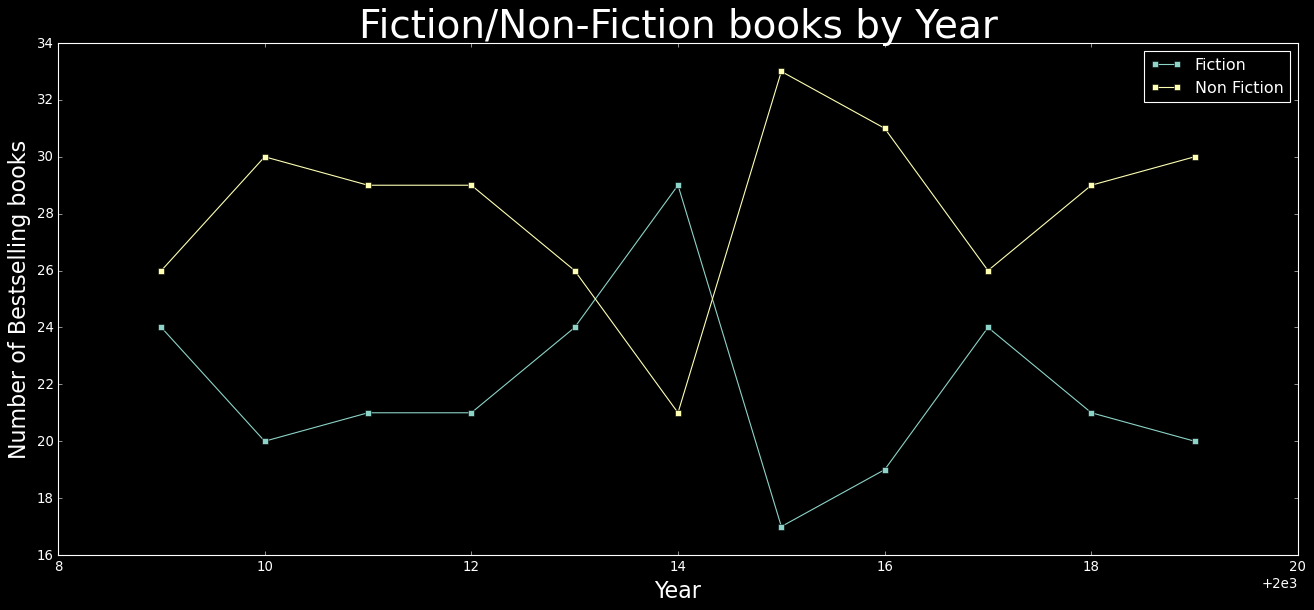

In [88]:
yearfiction = df.groupby(['Year', 'Genre']).size()
plt.rcParams['figure.figsize']=(20,8)
plt.style.use('dark_background')
plt.title('Fiction/Non-Fiction books by Year', fontsize= 35)
plt.plot(range(2009,2020), yearfiction[0:-1:2], label = 'Fiction', marker = 's')
plt.plot(range(2009,2020), yearfiction[1::2], label = 'Non Fiction', marker = 's')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Bestselling books', fontsize = 20)
plt.legend()
plt.show()


### Non-fictions are usually more popular but in 2014, its popularity plummetted but it soared to a new historical peak in around 2015.

### The popularity of fiction books seem to be falling since 2017.

In [14]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


<AxesSubplot:>

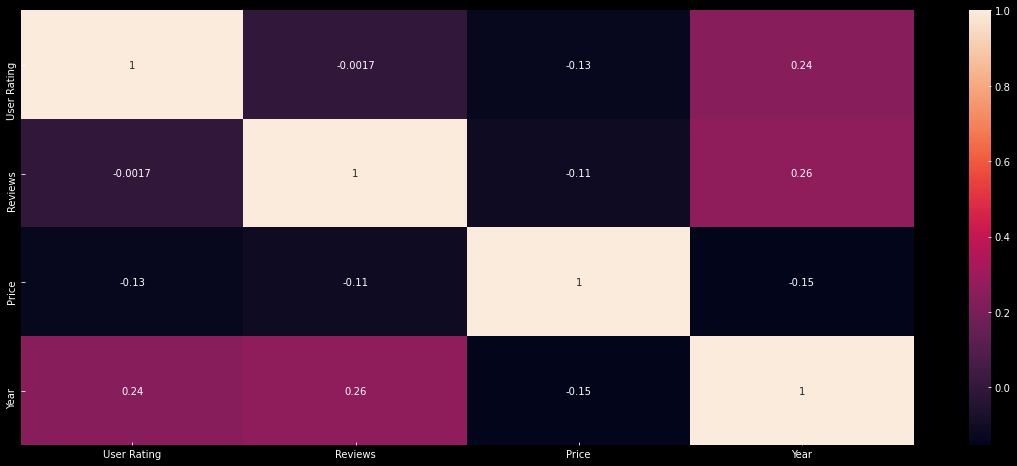

In [15]:
sns.heatmap(df.corr(), annot = True)

#### Looks like they're very weakly correlated to each other.

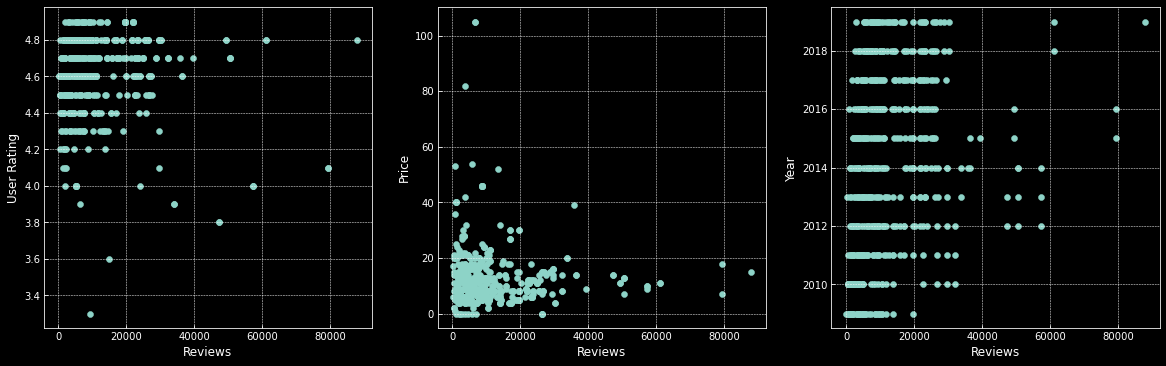

In [16]:

plt.style.use('dark_background')
plt.figure(figsize = (20,13))
plt.subplot(2,3,1)
plt.scatter(df['Reviews'], df['User Rating'])
plt.xlabel('Reviews')
plt.ylabel('User Rating')
plt.subplot(2,3,2)
plt.scatter(df['Reviews'], df['Price'])
plt.xlabel('Reviews')
plt.ylabel('Price')
plt.subplot(2,3,3)
plt.scatter(df['Reviews'], df['Year'])
plt.xlabel('Reviews')
plt.ylabel('Year')
plt.show()

#### 1. User ratings seem to be high for book with low reviews.
#### 2. Cheaper books seem to have more reviews than pricey ones.
#### 3. Reviews and Year do not seem to be strongly correlated.

# Most expensive books

In [17]:
df[df.Price == df.Price.max()]


,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction


# Distribution of User Ratings
    

<AxesSubplot:title={'center':'User Rating Distribution'}, xlabel='User Rating', ylabel='count'>

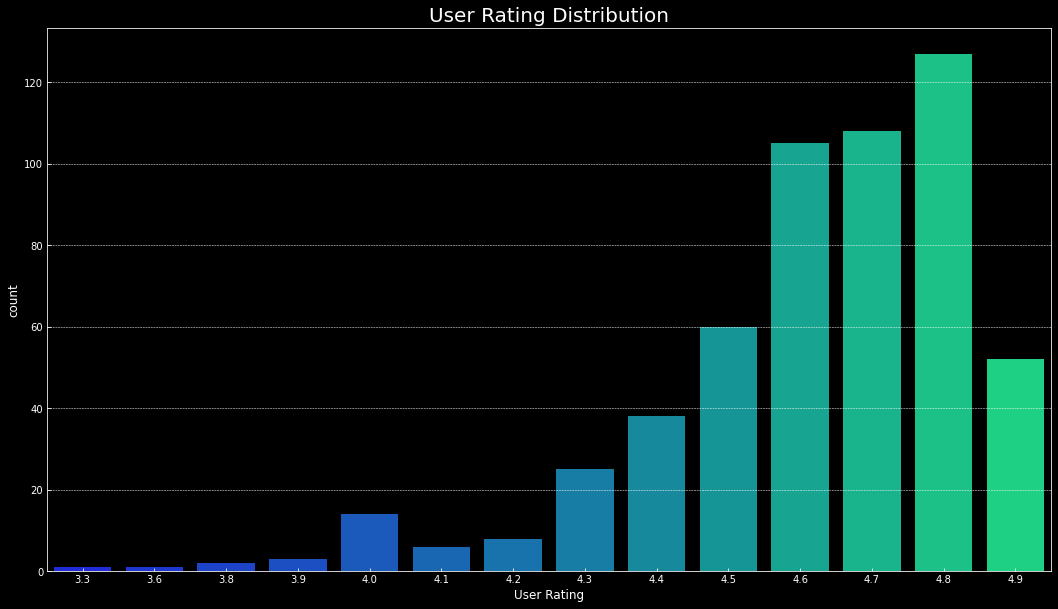

In [18]:
plt.rcParams['figure.figsize'] = (18,10)
plt.style.use('dark_background')
plt.title('User Rating Distribution', fontsize = 20)

sns.countplot(x = df['User Rating'], palette = 'winter')

### Around 130 books have recieved 4.8 rating whereas around 10 books have a rating less than 4.0

# Popularity of books


In [19]:
popularity = [0,0,0,0]

for i in df['User Rating']:
    if i >= 4.8:
        popularity[0] += 1
    elif i >= 4.5:
        popularity[1] += 1
    elif i >= 4.0:
        popularity[2] += 1
    else:
        popularity[3] +=1

Text(0.5, 1.0, 'Popularity of books')

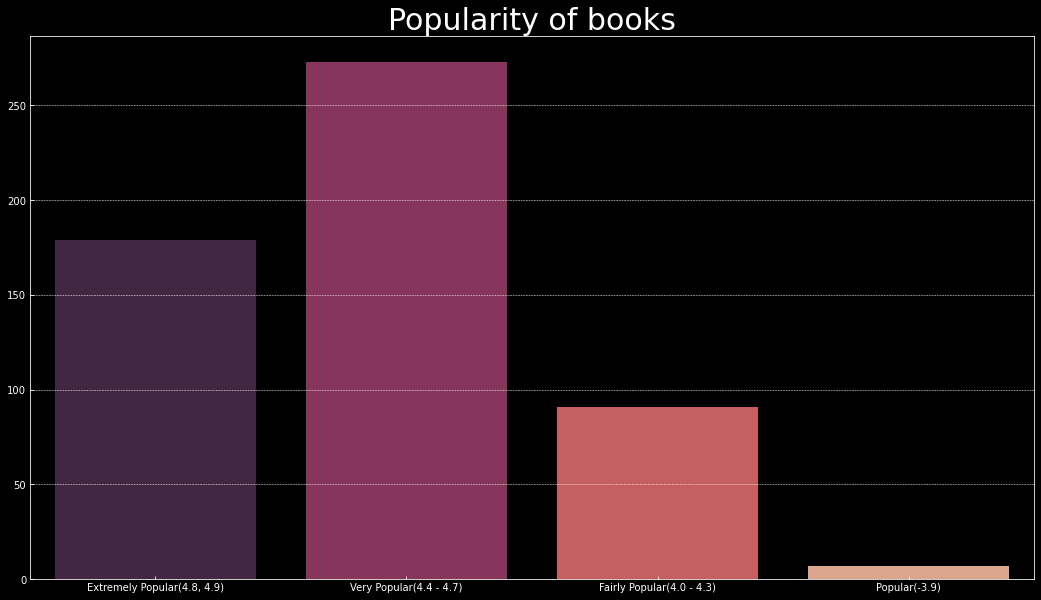

In [20]:
x = ['Extremely Popular(4.8, 4.9)', 'Very Popular(4.4 - 4.7)', 'Fairly Popular(4.0 - 4.3)', 'Popular(-3.9)']

sns.barplot(x=x, y = popularity, palette = 'rocket', saturation = 0.6)
plt.title('Popularity of books', fontsize = 30)

# Count of books with regards to Price

Text(0.5, 1.0, 'Count of books with regards to Price')

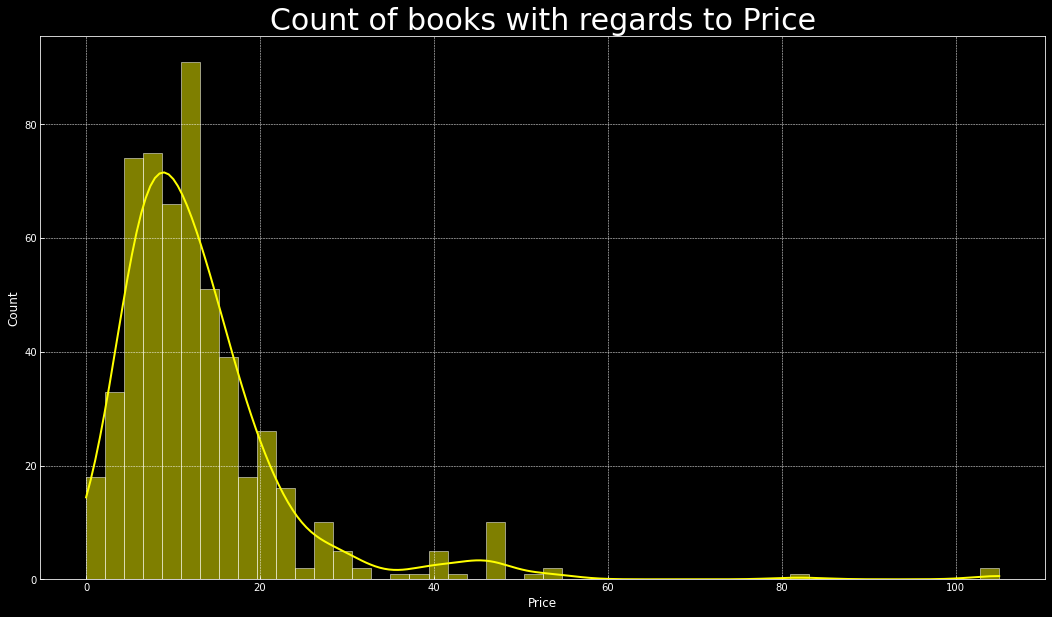

In [21]:

sns.histplot(df['Price'], color = 'yellow', kde = True)
plt.title('Count of books with regards to Price', fontsize = 30)

# Relation between User Rating and Price of book
### (Regression line graph)

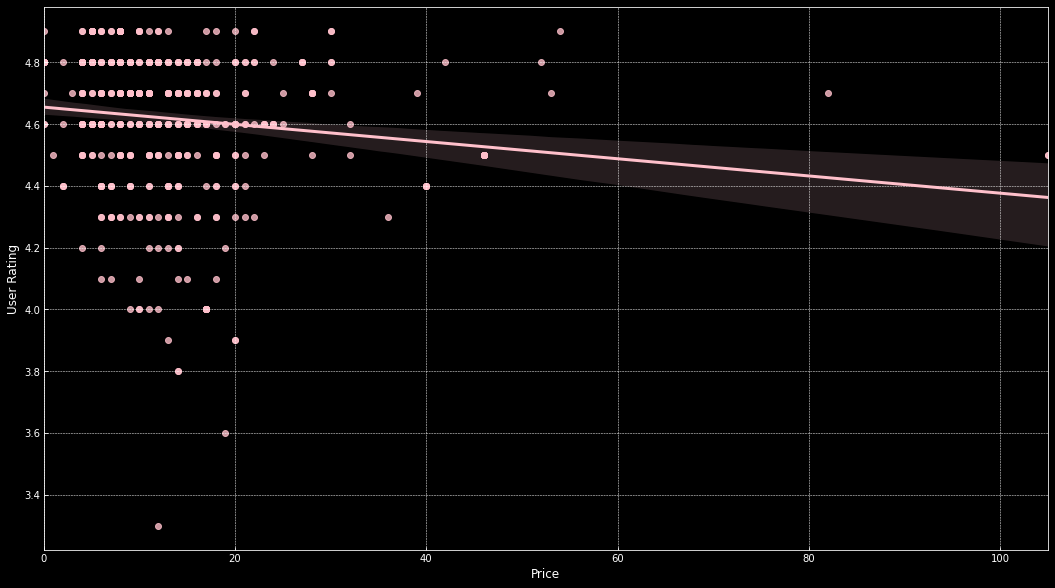

In [22]:
sns.regplot(data=df, x='Price', y='User Rating', color = 'pink')
plt.show()

### Point plot graph


<AxesSubplot:xlabel='Price', ylabel='User Rating'>

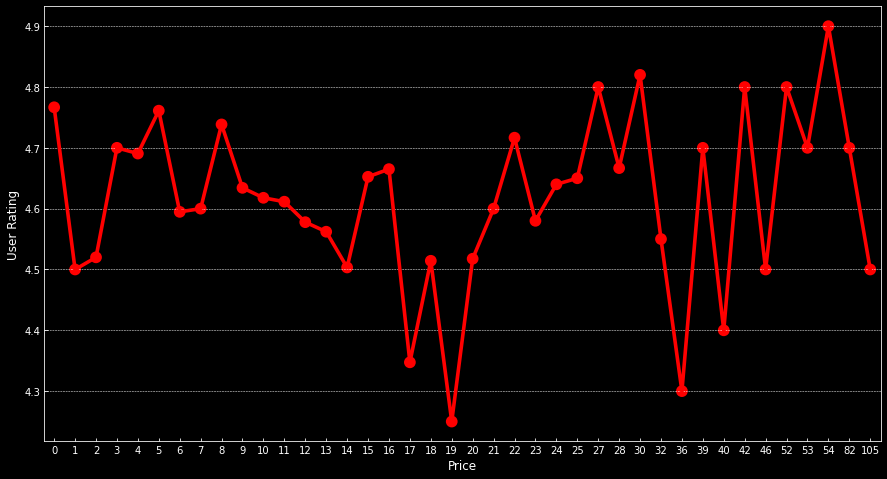

In [23]:
plt.figure(figsize = (15,8))
sns.pointplot(x = 'Price', y = 'User Rating', data = df, color = 'red', ci = None)

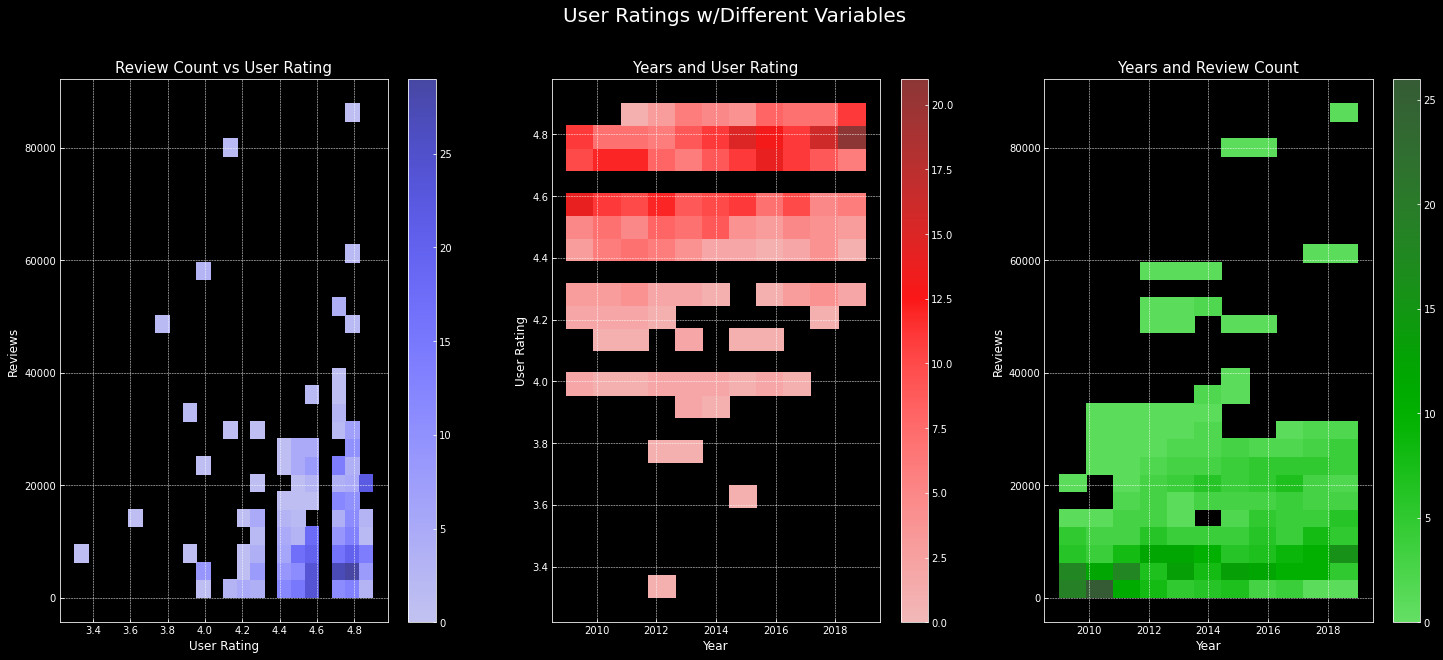

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (25,10), ncols = 3)
sns.histplot(x = "User Rating", y = "Reviews", data = df, 
              color = "blue", linestyles= "-" ,  ax= ax1, cbar = True)
sns.histplot(x = "Year", y = "User Rating", data = df, color = "red",  ax = ax2, cbar = True)
sns.histplot(x = "Year", y = "Reviews", data = df, color = "green",  ax = ax3, cbar = True)

ax1.set_xlabel("User Rating", fontsize = 12)
ax1.set_ylabel("Reviews", fontsize = 12)
ax2.set_xlabel("Year", fontsize = 12)
ax2.set_ylabel("User Rating", fontsize = 12)
ax3.set_xlabel("Year", fontsize = 12)
ax3.set_ylabel("Reviews", fontsize = 12)
ax1.set_title("Review Count vs User Rating", fontsize = 15)
ax2.set_title("Years and User Rating", fontsize = 15)
ax3.set_title("Years and Review Count", fontsize = 15)
plt.suptitle ("User Ratings w/Different Variables", fontsize = 20)
plt.savefig("Descriptive Analysis Amazon Books")
plt.show()

In [25]:
df[df['Price']==0].sort_values('User Rating', ascending = False)


,Name,Author,User Rating,Reviews,Price,Year,Genre
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
508,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2016,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction


### This is the list of bestselling free books. An interesting find is that out of 550 books, only 12 are free with only one book being a non-fiction book.

In [26]:
df[df['Reviews'] >=70000].sort_values('Year')

,Name,Author,User Rating,Reviews,Price,Year,Genre
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


### There are 3 books which have the highest number of reviews.

# Wordmap

In [27]:
import squarify

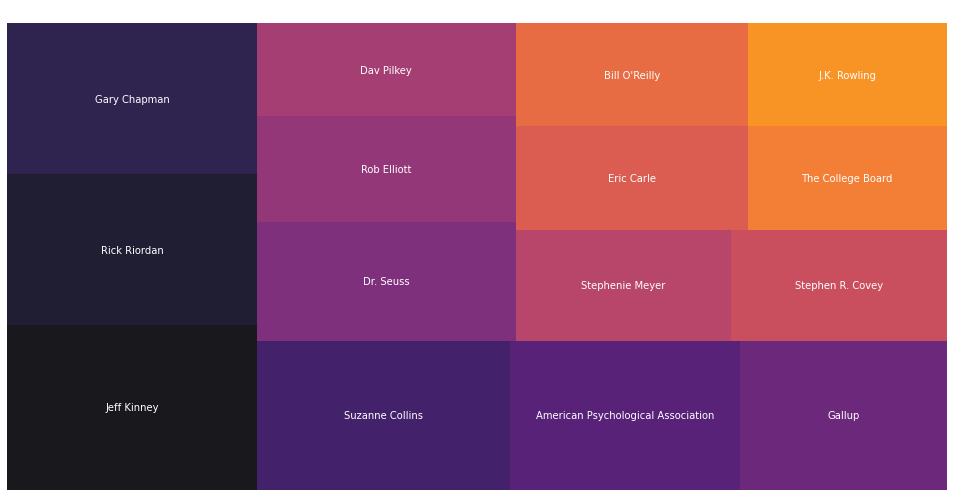

In [82]:
y = df['Author'].value_counts().head(15)

plt.rcParams['figure.figsize'] =(15,8)
plt.style.use('ggplot')

color = plt.cm.inferno(np.linspace(0,1,20))
squarify.plot(sizes = y.values, label = y.index, alpha = .9, color = color)
plt.title('Top 15 Popular Authors')
plt.axis('off')
plt.show()

#### Not much of a obvious difference between authors.
#### The most popular authors seem to be Jeff Kinney, Rick Riordan, Gary Chapman and the authors with fewest bestselling books in the top 15 list seem to be J.K.Rowling and The College Board.